In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

# Conjunto Treino:

### Acessando os Labels do Conjunto Treino:

In [2]:
file_train_labels = gzip.open('train-labels-idx1-ubyte.gz','r')

file_train_labels.read(8)

buf_train_labels = file_train_labels.read(6000)

data_train_labels = np.frombuffer(buf_train_labels, dtype=np.uint8).astype(np.int32)

train_labels = data_train_labels

# Pritando os labels do Conjunto Treino
print(train_labels[:10])

[5 0 4 1 9 2 1 3 1 4]


### Acessando as Imagens do Conjunto Treino:

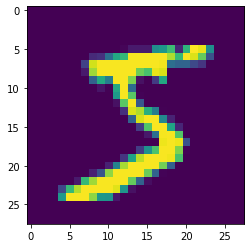

Foto 1



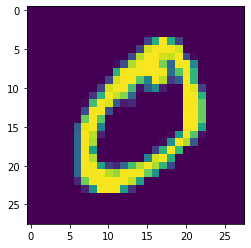

Foto 2



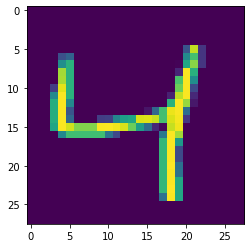

Foto 3



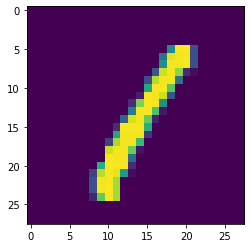

Foto 4



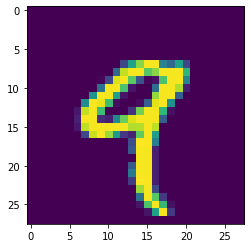

Foto 5



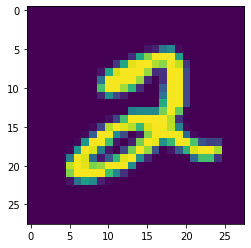

Foto 6



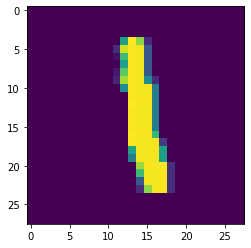

Foto 7



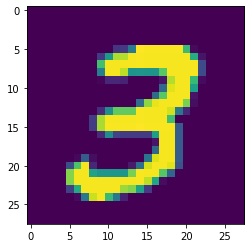

Foto 8



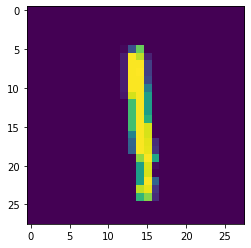

Foto 9



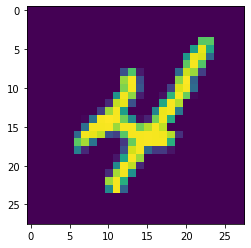

Foto 10



In [3]:
file_train_images = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images_train = 6000

file_train_images.read(16)

buf_train_images = file_train_images.read(image_size * image_size * num_images_train)

data_train_images = np.frombuffer(buf_train_images, dtype=np.uint8).astype(np.float32)
data_train_images = data_train_images.reshape(num_images_train, image_size, image_size, 1)

train_images = data_train_images

# Plot das Imagens do Conjunto Treino
for i in range(0, 10):
    plt.imshow(np.asarray(data_train_images[i]).squeeze())
    plt.show()
    print("Foto {}".format(i+1))
    print()

# Conjunto Teste:

### Acessando os Labels do Conjunto Teste:

In [4]:
file_test_labels = gzip.open('t10k-labels-idx1-ubyte.gz','r')

file_test_labels.read(8)

buf_test_labels = file_test_labels.read(1000)

data_test_labels = np.frombuffer(buf_test_labels, dtype=np.uint8).astype(np.int32)

test_labels = data_test_labels

# Pritando os labels do Conjunto Teste
print(test_labels[:10])

[7 2 1 0 4 1 4 9 5 9]


### Acessando as Imagens do Conjunto Teste:

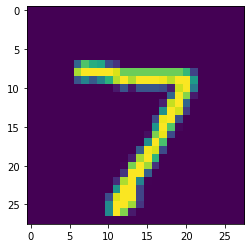

Foto 1



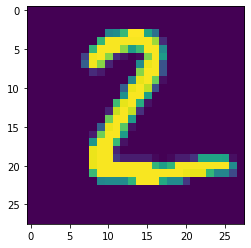

Foto 2



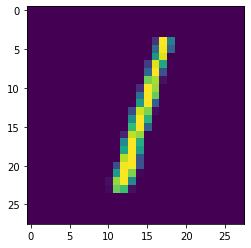

Foto 3



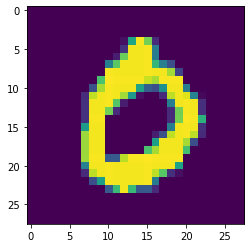

Foto 4



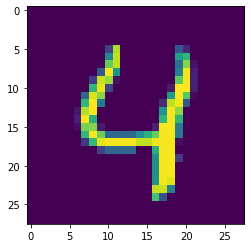

Foto 5



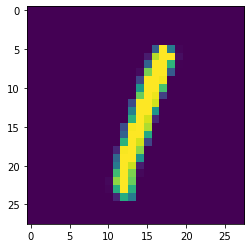

Foto 6



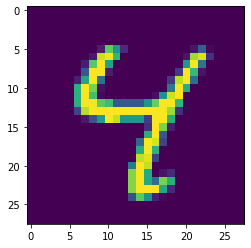

Foto 7



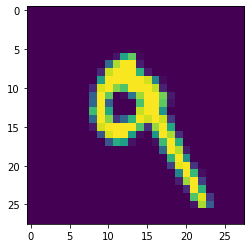

Foto 8



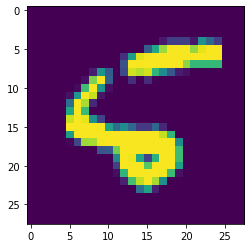

Foto 9



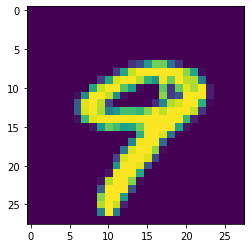

Foto 10



In [5]:
file_test_images = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images_test = 1000

file_test_images.read(16)

buf_test_images = file_test_images.read(image_size * image_size * num_images_test)

data_test_images = np.frombuffer(buf_test_images, dtype=np.uint8).astype(np.float32)
data_test_images = data_test_images.reshape(num_images_test, image_size, image_size, 1)

test_images = data_test_images

for i in range(0, 10):
    plt.imshow(np.asarray(data_test_images[i]).squeeze())
    plt.show()
    print("Foto {}".format(i+1))
    print()

# Tratamento das Imagens:

### Tratando as imagens do Conjunto Treino:

In [6]:
# Criando matriz de dados Não-Centralizada

X_train = np.asarray(train_images).squeeze().reshape(num_images_train, 784)
print(X_train.shape)

(6000, 784)


In [7]:
# Calculando media e centralizando dados
train_mean = np.mean(X_train, axis = 0)

X_train = (X_train - train_mean)
print(X_train.shape)

(6000, 784)


In [8]:
# Calculando Matriz de Cov
covx_train = np.cov(X_train)
print(covx_train.shape)

(6000, 6000)


In [9]:
# Decomposição Espectral da CovX
V_train, Q_train = np.linalg.eig(covx_train)

In [10]:
# Como a função eig retorna números complexos, pegaremos apenas a parte real de V e Q
V_train = V_train.real
print(V_train.shape)

(6000,)


In [11]:
Q_train = Q_train.real
print(Q_train.shape)

(6000, 6000)


In [12]:
# Calculando a matriz P (ou Y - Dados Artificiais)
P_train = np.dot(X_train.T,Q_train)
print(P_train.shape)

(784, 6000)


In [13]:
# Estabelecendo número de autovalores a ser utilizado para remodelar a imagem
autovalor_num = 50

In [14]:
# Criando a Matriz Final
X_train = np.dot(Q_train[:,:autovalor_num], P_train.T[:autovalor_num,:])
print(X_train.shape)

(6000, 784)


In [15]:
# Retonando a media
X_train = (X_train + train_mean)
print(X_train.shape)

(6000, 784)


In [16]:
# Voltando ao formato imagem
train_image_plot = X_train[0] # Foi escolhido como exemplo a image[0], ou seja primeira imagem do Conjunto Treino
print(train_image_plot.shape)

(784,)


In [17]:
train_image_plot = train_image_plot.reshape((28, 28))
print(train_image_plot.shape)

(28, 28)


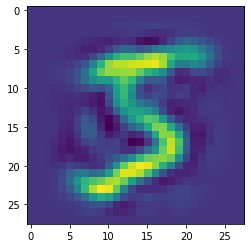

In [18]:
# Plot da imagem final (Exemplo)
train_image_plot = np.asarray(train_image_plot)
plt.imshow(train_image_plot)
plt.show()

### Tratando as imagens do Conjunto Teste:

In [19]:
# Criando matriz de dados Não-Centralizada

X_test = np.asarray(test_images).squeeze().reshape(num_images_test, 784)
print(X_test.shape)

(1000, 784)


In [20]:
# Calculando media e centralizando dados
test_mean = np.mean(X_test, axis = 0)

X_test = (X_test - test_mean)
print(X_test.shape)

(1000, 784)


In [21]:
# Calculando Matriz de Cov
covx_test = np.cov(X_test)
print(covx_test.shape)

(1000, 1000)


In [22]:
# Decomposição Espectral da CovX
V_test, Q_test = np.linalg.eig(covx_test)

In [23]:
# Como a função eig retorna números complexos, pegaremos apenas a parte real de V e Q
V_test = V_test.real
print(V_test.shape)

(1000,)


In [24]:
Q_test = Q_test.real
print(Q_test.shape)

(1000, 1000)


In [25]:
# Calculando a matriz P (ou Y - Dados Artificiais)
P_test = np.dot(X_test.T,Q_test,)
print(P_test.shape)

(784, 1000)


In [26]:
# Criando a Matriz Final
X_test = np.dot(Q_test[:,:autovalor_num], P_test.T[:autovalor_num,:])
print(X_test.shape)

(1000, 784)


In [27]:
# Retonando a media
X_test = (X_test + test_mean)
print(X_test.shape)

(1000, 784)


In [28]:
# Voltando ao formato imagem
test_image_plot = X_test[0] # Foi escolhido como exemplo a image[0], ou seja primeira imagem do Conjunto Teste
print(test_image_plot.shape)

(784,)


In [29]:
test_image_plot = test_image_plot.reshape((28, 28))
print(test_image_plot.shape)

(28, 28)


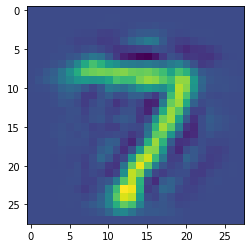

In [30]:
# Plot da imagem final (Exemplo)
test_image_plot = np.asarray(test_image_plot)
plt.imshow(test_image_plot)
plt.show()

# Resultado:

### Reconhecimento (Usando Distância Euclidiana):

In [31]:
successes = 0

for i in range(0, num_images_test):
    
    image_test_recognition = X_test[i].reshape((784, 1))
    
    min_distance = 0
    index = 0
    
    for j in range(0, num_images_train):
        
        image_train_recognition = X_train[j].reshape((784, 1))
        
        aux_image = image_test_recognition - image_train_recognition
        
        if j == 0:
            min_distance = np.linalg.norm(aux_image)
        else:
            if np.linalg.norm(aux_image) < min_distance:
                min_distance = np.linalg.norm(aux_image)
                index = j
                
    if test_labels[i] == train_labels[index]:
        successes += 1

print("Accuracy = {:.2f}% | {} successes".format((successes/num_images_test)*100, successes))

Accuracy = 92.80% | 928 successes


In [32]:
# Accuracy (Autovalores)

# - 50 Autovalores - 92.80% (928 successes)
# - 100 Autovalores - 91,80% (918 sucesses)

### Variabilidade:

In [33]:
soma_autovalores_escolhidos = 0

for i in range(0, autovalor_num):
    soma_autovalores_escolhidos += V_train[i]
    
soma_autovalores = 0

for i in range(0, image_size**2):
    soma_autovalores += V_train[i]

variabilidade_acumulada = soma_autovalores_escolhidos / soma_autovalores
    
print("Variabilidade acumulada: {:.2f}, até o {}-ésimo autovalor".format(100*variabilidade_acumulada, autovalor_num))

Variabilidade acumulada: 82.58, até o 50-ésimo autovalor


In [34]:
# Var. Acumulada (Autovalores)

# - 50 Autovalores - 82.58% (928 successes)
# - 100 Autovalores - 91.60%